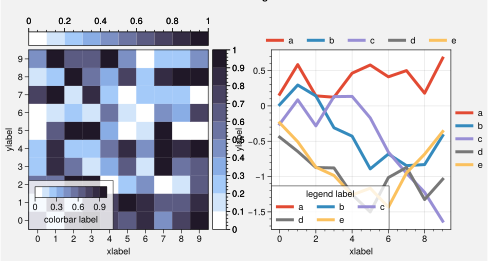

In [1]:
import proplot as plot
import numpy as np
with plot.rc.context(abc=True):
    fig, axs = plot.subplots(ncols=2, share=0)

# Colorbars
ax = axs[0]
state = np.random.RandomState(51423)
m = ax.heatmap(state.rand(10, 10), colorbar='t', cmap='dusk')
ax.colorbar(m, loc='r')
ax.colorbar(m, loc='ll', label='colorbar label')
ax.format(title='Axes colorbars', suptitle='Axes colorbars and legends demo')

# Legends
ax = axs[1]
ax.format(title='Axes legends', titlepad='0em')
hs = ax.plot(
    (state.rand(10, 5) - 0.5).cumsum(axis=0), linewidth=3,
    cycle='ggplot', legend='t',
    labels=list('abcde'), legend_kw={'ncols': 5, 'frame': False}
)
ax.legend(hs, loc='r', ncols=1, frame=False)
ax.legend(hs, loc='ll', label='legend label')
axs.format(xlabel='xlabel', ylabel='ylabel')

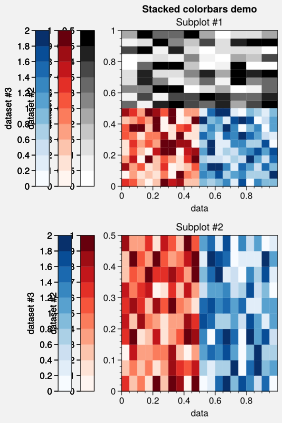

In [2]:
import proplot as plot
import numpy as np
fig, axs = plot.subplots(nrows=2, share=0, refwidth='55mm', panelpad='1em')
axs.format(suptitle='Stacked colorbars demo')
state = np.random.RandomState(51423)
N = 10
# Repeat for both axes
for j, ax in enumerate(axs):
    ax.format(
        xlabel='data', xlocator=np.linspace(0, 0.8, 5),
        title=f'Subplot #{j+1}'
    )
    for i, (x0, y0, x1, y1, cmap, scale) in enumerate((
        (0, 0.5, 1, 1, 'grays', 0.5),
        (0, 0, 0.5, 0.5, 'reds', 1),
        (0.5, 0, 1, 0.5, 'blues', 2)
    )):
        if j == 1 and i == 0:
            continue
        data = state.rand(N, N) * scale
        x, y = np.linspace(x0, x1, N + 1), np.linspace(y0, y1, N + 1)
        m = ax.pcolormesh(
            x, y, data, cmap=cmap,
            levels=np.linspace(0, scale, 11)
        )
        ax.colorbar(m, loc='l', label=f'dataset #{i+1}')

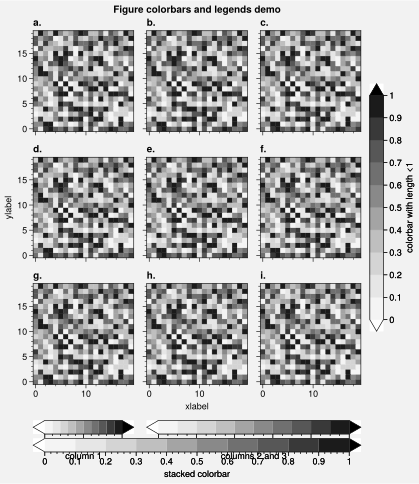

In [3]:
import proplot as plot
import numpy as np
fig, axs = plot.subplots(ncols=3, nrows=3, refwidth=1.4)
state = np.random.RandomState(51423)
m = axs.pcolormesh(
    state.rand(20, 20), cmap='grays',
    levels=np.linspace(0, 1, 11), extend='both'
)[0]
axs.format(
    suptitle='Figure colorbars and legends demo', abc=True,
    abcloc='l', abcstyle='a.', xlabel='xlabel', ylabel='ylabel'
)
fig.colorbar(m, label='column 1', ticks=0.5, loc='b', col=1)
fig.colorbar(m, label='columns 2 and 3', ticks=0.2, loc='b', cols=(2, 3))
fig.colorbar(m, label='stacked colorbar', ticks=0.1, loc='b', minorticks=0.05)
fig.colorbar(m, label='colorbar with length <1', ticks=0.1, loc='r', length=0.7)

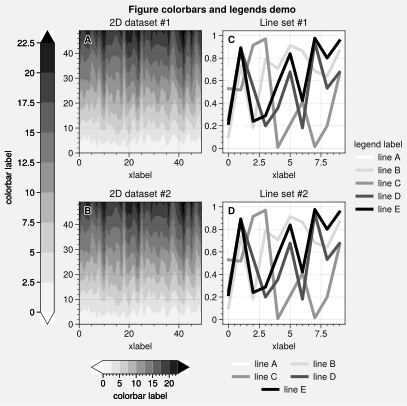

In [4]:
import proplot as plot
import numpy as np
fig, axs = plot.subplots(
    ncols=2, nrows=2, refwidth=1.7,
    share=0, wspace=0.3, order='F'
)

# Plot data
data = (np.random.rand(50, 50) - 0.1).cumsum(axis=0)
m = axs[:2].contourf(data, cmap='grays', extend='both')
colors = plot.Colors('grays', 5)
hs = []
state = np.random.RandomState(51423)
for abc, color in zip('ABCDEF', colors):
    h = axs[2:].plot(state.rand(10), lw=3, color=color, label=f'line {abc}')
    hs.extend(h[0])

# Add colorbars and legends
fig.colorbar(m[0], length=0.8, label='colorbar label', loc='b', col=1, locator=5)
fig.colorbar(m[0], label='colorbar label', loc='l')
fig.legend(hs, ncols=2, center=True, frame=False, loc='b', col=2)
fig.legend(hs, ncols=1, label='legend label', frame=False, loc='r')
axs.format(
    suptitle='Figure colorbars and legends demo',
    abc=True, abcloc='ul', abcstyle='A'
)
for ax, title in zip(
    axs, ['2D dataset #1', '2D dataset #2', 'Line set #1', 'Line set #2']
):
    ax.format(xlabel='xlabel', title=title)

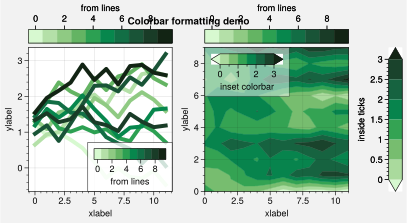

In [5]:
import proplot as plot
import numpy as np
fig, axs = plot.subplots(share=0, ncols=2, refwidth=2)

# Colorbars from lines
ax = axs[0]
state = np.random.RandomState(51423)
data = 1 + (state.rand(12, 10) - 0.45).cumsum(axis=0)
cycle = plot.Cycle('algae')
hs = ax.plot(
    data, lw=4, cycle=cycle, colorbar='lr',
    colorbar_kw={'length': '8em', 'label': 'from lines'}
)
axs.colorbar(
    hs, loc='t', values=np.arange(0, 10),
    label='from lines', ticks=2
)

# Colorbars from a mappable
ax = axs[1]
m = ax.contourf(
    data.T, extend='both', cmap='algae',
    levels=plot.arange(0, 3, 0.5)
)
fig.colorbar(
    m, length=1, loc='r', label='inside ticks',
    tickloc='left'
)
ax.colorbar(
    m, loc='ul', length=1, tickminor=True,
    label='inset colorbar', alpha=0.5
)
axs.format(
    suptitle='Colorbar formatting demo',
    xlabel='xlabel', ylabel='ylabel', titleabove=False
)

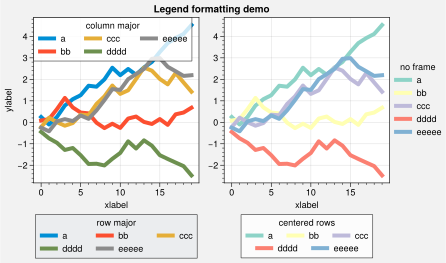

In [6]:
import proplot as plot
import numpy as np
plot.rc.cycle = '538'
labels = ['a', 'bb', 'ccc', 'dddd', 'eeeee']
fig, axs = plot.subplots(ncols=2, span=False, share=1, refwidth=2.3)
hs1, hs2 = [], []

# On-the-fly legends
state = np.random.RandomState(51423)
for i, label in enumerate(labels):
    data = (state.rand(20) - 0.45).cumsum(axis=0)
    h1 = axs[0].plot(
        data, lw=4, label=label, legend='ul',
        legend_kw={'order': 'F', 'title': 'column major'}
    )
    hs1.extend(h1)
    h2 = axs[1].plot(
        data, lw=4, label=label, legend='r', cycle='Set3',
        legend_kw={'ncols': 1, 'frame': False, 'title': 'no frame'}
    )
    hs2.extend(h2)

# Outer legends
ax = axs[0]
ax.legend(
    hs1, loc='b', ncols=3, title='row major', order='C',
    facecolor='gray2'
)
ax = axs[1]
ax.legend(hs2, loc='b', ncols=3, center=True, title='centered rows')
axs.format(xlabel='xlabel', ylabel='ylabel', suptitle='Legend formatting demo')